In [1]:
import numpy as np
from numpy.matlib import repmat
import matplotlib.pyplot as plt
from load_data import load_skl_data, load_circular_data, load_two_spirals, load_random_classification_dataset
from vicinal import single_point_vicinal
from utilities import visclassifier

In [2]:
train_data, train_labels, val_data, val_labels, test_data, test_labels = load_two_spirals(120)

In [3]:
from sklearn.neural_network import MLPClassifier

In [4]:
nn = MLPClassifier(hidden_layer_sizes=(1000, 100), max_iter=1000, alpha=0.)
nn.fit(train_data, train_labels)
print(np.mean(nn.predict(train_data) == train_labels), np.mean(nn.predict(val_data) == val_labels), np.mean(nn.predict(test_data) == test_labels))

1.0 0.625 0.6666666666666666


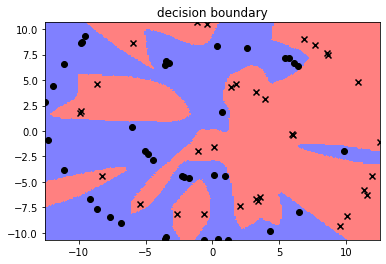

In [5]:
visclassifier(nn.predict, train_data, train_labels, 'decision boundary')

In [6]:
data_perturb, labels_perturb = single_point_vicinal(train_data, train_labels, 0.8, 0.3, 3, 4, 'laplace', augment=False)

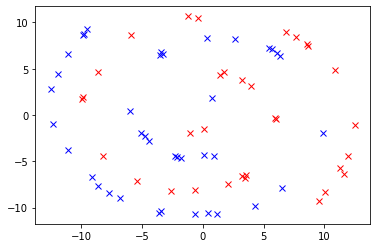

In [7]:
plt.plot(train_data[train_labels == 1, 0], train_data[train_labels == 1, 1], 'rx')
plt.plot(train_data[train_labels == -1, 0], train_data[train_labels == -1, 1], 'bx')
plt.show()

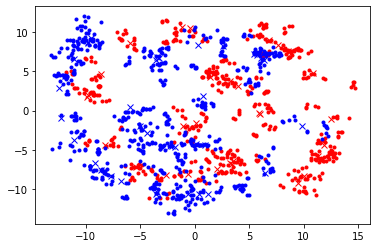

In [8]:
plt.plot(train_data[train_labels == 1, 0], train_data[train_labels == 1, 1], 'rx')
plt.plot(train_data[train_labels == -1, 0], train_data[train_labels == -1, 1], 'bx')
plt.plot(data_perturb[labels_perturb == 1, 0], data_perturb[labels_perturb == 1, 1], 'r.')
plt.plot(data_perturb[labels_perturb == -1, 0], data_perturb[labels_perturb == -1, 1], 'b.')
plt.show()

In [9]:
nn_perturb = MLPClassifier(hidden_layer_sizes=(1000, 100), max_iter=1000, alpha=0.)
nn_perturb.fit(data_perturb, labels_perturb)
print(np.mean(nn_perturb.predict(data_perturb) == labels_perturb), np.mean(nn_perturb.predict(val_data) == val_labels), np.mean(nn_perturb.predict(test_data) == test_labels))

0.9157407407407407 0.7083333333333334 0.6666666666666666


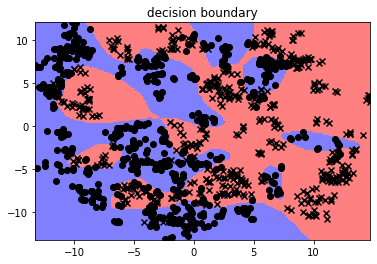

In [10]:
visclassifier(nn_perturb.predict, data_perturb, labels_perturb, 'decision boundary')

In [12]:
data_augment, labels_augment = single_point_vicinal(train_data, train_labels, 0.8, 0.3, 3, 4, 'laplace', augment=True)
nn_augment = MLPClassifier(hidden_layer_sizes=(1000, 100), max_iter=1000, alpha=0.)
nn_augment.fit(data_augment, labels_augment)
print(np.mean(nn_augment.predict(data_augment) == labels_augment), np.mean(nn_augment.predict(val_data) == val_labels), np.mean(nn_augment.predict(test_data) == test_labels))

0.8706597222222222 0.7083333333333334 0.6666666666666666


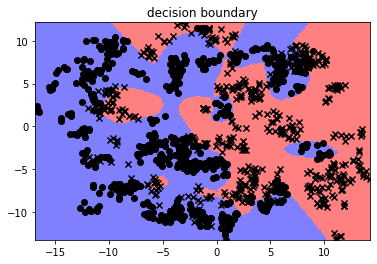

In [13]:
visclassifier(nn_augment.predict, data_augment, labels_augment, 'decision boundary')